# Importing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

# Importing Train Dataset

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Train 2',
                                                 batch_size = 300,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

Found 279 images belonging to 2 classes.


# Manipulation of Training dataset

In [3]:
X, Y = next(iter(training_set))

In [4]:
L = []
for i in range(Y.size):
    L.append(X[i].flatten())

X = np.asarray(L)

# Splitting the training dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Hyperparameter tuning using GridSearch

In [6]:
from sklearn.svm import SVC
classifier = SVC()
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf','poly','sigmoid'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 66.82 %
Best Parameters: {'C': 0.25, 'gamma': 0.1, 'kernel': 'poly'}


# Creating a kernel SVM classifier object

In [9]:
classifier2 = SVC(C=0.25,kernel='poly',gamma=0.1)
classifier2.fit(X_train,Y_train)

SVC(C=0.25, gamma=0.1, kernel='poly')

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
X_Pred = classifier2.predict(X_test)
cm = confusion_matrix(Y_test,X_Pred)
print(cm)
accuracy_score(Y_test,X_Pred)

[[21  8]
 [10 17]]


0.6785714285714286

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier2, X = X_train, y = Y_train , cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.33 %
Standard Deviation: 12.48 %


In [12]:
Test_datagen = ImageDataGenerator(rescale = 1./255)
Test_set = Test_datagen.flow_from_directory('C:/Users/HP/Desktop/Images/Test',
                                                 batch_size = 35,
                                                 target_size = (150,150),
                                                 class_mode = 'binary')

test_inputs,test_targets = next(iter(Test_set))

L = []
for i in range(test_targets.size):
    L.append(test_inputs[i].flatten())

test_inputs = np.asarray(L)

Found 35 images belonging to 2 classes.


In [13]:
Test_set.class_indices

{'No Pipes': 0, 'PVC Pipes': 1}

Accuracy based on Test data is 60.00%
[[ 2 13]
 [ 1 19]]


Text(33.0, 0.5, 'Predicted class')

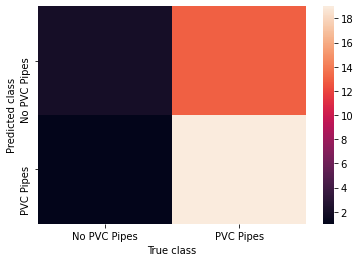

In [14]:
test_pred = classifier2.predict(test_inputs)

accuracy = accuracy_score(test_targets,test_pred)

print(f'Accuracy based on Test data is {accuracy*100:.2f}%')

cm = confusion_matrix(test_targets,test_pred)

print(cm)

sns.heatmap(cm,xticklabels=['No PVC Pipes','PVC Pipes'],yticklabels=['No PVC Pipes','PVC Pipes'])
plt.xlabel('True class')
plt.ylabel('Predicted class')